# Optimization project: K-Menas Clustering

__Given that we don't have the proper datafiles to run the code, we will use synthetic ones to still do the work, and
as soon as we have the real files we will just substitute them.__

In [1]:
import numpy as np
from numpy import random
import random
import pandas as pd
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score 

#Simulate dataframe
X1 = np.random.uniform(low=0, high=25, size=(200,))
X2 = np.random.uniform(low=5, high=30, size=(200))
df = pd.DataFrame({'i': X1, 'j': X2}, columns=['i', 'j'])

In [2]:
df

,i,j
0,16.711382,29.732239
1,21.719754,9.626242
2,21.974654,8.677797
3,8.125610,19.690598
4,2.864392,7.869750
...,...,...
195,19.834264,9.188868
196,17.183094,12.194000
197,15.352513,26.660821
198,14.197039,16.471075


## K-means Clustering:


In [3]:
# Randomly assign indeces of cluster centroids:
def initiate_centroids(n, df):
    centroids = []
    random.seed(42) # use this since we want to compare the different number of clusters
    
    #generate random centroid indeces
    initial_index_centroid = random.sample(range(0, len(df)), n)
    
    #find the data points corresponding the the indeces:
    for i in initial_index_centroid:
        centroids.append(df.loc[i])
    return centroids


# To calculate the distance between two points:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5


# To find the closest centroid to each data point:
def findClosestCentroids(centroids, df):
    assigned_centroid = []
    
    #iterate over every data point in the dataframe:
    for index, row in df.iterrows():
        distance=[]
        
        #find distance of data point with each cluster:
        for center in centroids:
            distance.append(calc_distance(row, center))
            
        #assign data point to closest cluster:
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid


#To update the centroid of the clusters:
def calc_centroids(clusters, df):
    
    #initiate empty list for new centroids of each cluster:
    new_centroids = []
    
    #df including each point and its respective cluster
    new_df = pd.concat([pd.DataFrame(df), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    
    #iterate over the distinct clusters
    for c in set(new_df['cluster']):
        
        #take out the data points corresponding to each cluster:
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        
        #find the new cluster centroid which is the mean of the clusters we already assigned
        cluster_mean = current_cluster.mean(axis=0)
        
        #append the new centroid
        new_centroids.append(cluster_mean)
        
    return new_centroids


#Recursively find and update cluster centroids:
#n: number of clusters, df: dataframe of data points, iterations: number of iterations
def recursive_centroid_find(n, df):
    
    #initiate centroids1:
    centroids1 = initiate_centroids(n, df)
    c1 = pd.DataFrame(centroids1).reset_index(drop=True)
    
    #initate centroids2:
    centroids2 = calc_centroids(findClosestCentroids(centroids1, df), df)
    c2 = pd.DataFrame(centroids2)
    check = (abs(c2-c1)> 0).mean().mean() #Should be adjusted for more than two dimensions!
    
    # Recursively call the functions again to update the mean of the clusters:
    while check > 0:
        
        centroids1 = centroids2
        c1 = c2
        
        
        centroids2 = calc_centroids(findClosestCentroids(centroids1, df), df)
        c2 = pd.DataFrame(centroids2)
        print(c2)
        
        check = (abs(c2-c1)> 0).mean().mean()
        #plot the centroids after every iteration:
        plt.figure()
        plt.scatter(np.array(centroids2)[:, 0], np.array(centroids2)[:, 1], color='red')
        plt.scatter(df.i, df.j, alpha=0.1)
        plt.show()
    return pd.DataFrame(centroids2)


           i          j
0   6.717433  13.314227
1  16.718745  21.610970
2   6.009251  25.560380
3  19.693386   9.824445
4  17.783179  28.394914


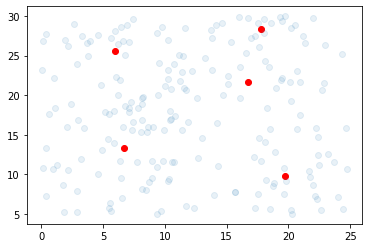

           i          j
0   6.706914  12.921110
1  16.451469  21.349898
2   6.209442  25.117455
3  19.898728   9.921313
4  17.989135  28.154226


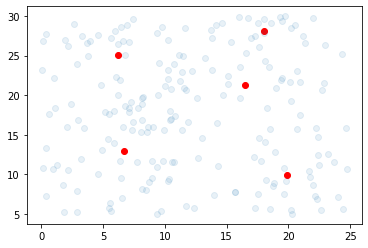

           i          j
0   6.762452  12.736851
1  16.451469  21.349898
2   6.144306  24.819122
3  19.898728   9.921313
4  17.989135  28.154226


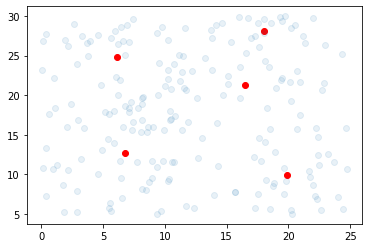

           i          j
0   6.762452  12.736851
1  16.672117  21.369581
2   6.247869  24.723868
3  19.898728   9.921313
4  17.989135  28.154226


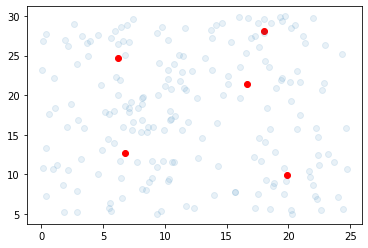

           i          j
0   6.740514  12.642914
1  16.876471  21.310298
2   6.408133  24.549004
3  19.898728   9.921313
4  17.989135  28.154226


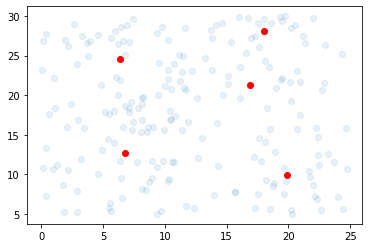

           i          j
0   6.739759  12.549397
1  17.155637  21.074582
2   6.522025  24.360665
3  19.934885   9.769826
4  17.989135  28.154226


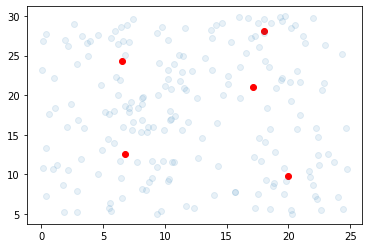

           i          j
0   6.739759  12.549397
1  17.155637  21.074582
2   6.522025  24.360665
3  19.934885   9.769826
4  17.989135  28.154226


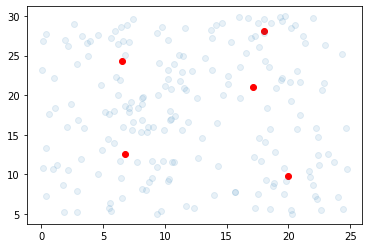

,i,j
0,6.739759,12.549397
1,17.155637,21.074582
2,6.522025,24.360665
3,19.934885,9.769826
4,17.989135,28.154226


In [4]:
recursive_centroid_find(5, df)

In [11]:
x=[]
y=[]
for n in range(2, 199, 15):
    x.append(n)
    get_centroids = findClosestCentroids(initiate_centroids(n, df), df)
    y.append(davies_bouldin_score(df, get_centroids))

In [12]:
findClosestCentroids(initiate_centroids(6, df), df)

[1,
 4,
 0,
 5,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 5,
 2,
 4,
 5,
 2,
 2,
 0,
 2,
 4,
 2,
 4,
 3,
 2,
 5,
 4,
 1,
 2,
 2,
 2,
 2,
 4,
 3,
 5,
 4,
 2,
 5,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 4,
 2,
 4,
 0,
 1,
 2,
 4,
 1,
 4,
 2,
 4,
 2,
 3,
 2,
 4,
 5,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 4,
 4,
 3,
 2,
 1,
 4,
 2,
 1,
 2,
 5,
 2,
 2,
 3,
 3,
 1,
 0,
 3,
 2,
 2,
 0,
 5,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 4,
 5,
 3,
 4,
 1,
 1,
 2,
 4,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 1,
 4,
 2,
 4,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 4,
 4,
 3,
 4,
 2,
 4,
 2,
 2,
 2,
 5,
 2,
 2,
 4,
 4,
 3,
 2,
 4,
 2,
 5,
 4,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 0,
 2,
 3,
 1,
 4,
 4,
 2,
 3,
 2,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 3,
 5,
 3,
 4,
 2,
 2,
 4,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 5,
 2,
 1,
 4,
 2,
 2,
 2]

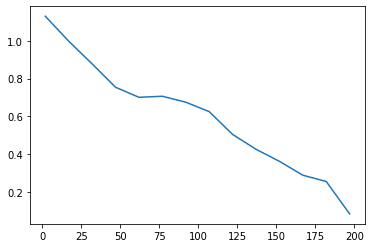

In [111]:
plt.plot(x,y)

For this data, makes no sense because there is no cluster, we just generated random uniformly distributed points, so the more clusters we have the better the score.

want to optimize bouldin(K) such that K > 1, K < N-1

In [13]:
from sklearn import datasets 
from sklearn.cluster import KMeans 
from sklearn.metrics import davies_bouldin_score 
from sklearn.datasets.samples_generator import make_blobs 
  
# loading the dataset 
X, y_true = make_blobs(n_samples=300, centers=4,  
                       cluster_std=0.50, random_state=0) 
  
# K-Means 
kmeans = KMeans(n_clusters=4, random_state=1).fit(X) 
  
# we store the cluster labels 
labels = kmeans.labels_ 
  
print(davies_bouldin_score(X, labels)) 


0.3662877051289654


/home/elio/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
